In [1]:
import pandas as pd
friends_df = pd.read_csv(filepath_or_buffer='/kaggle/input/friends/friends.csv')
friends_df.head()

,text,speaker,season,episode,scene,utterance
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,1,2
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,1,3
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,1,4
4,"(They all stare, bemused.)",Scene Directions,1,1,1,5


In [2]:
friends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67373 entries, 0 to 67372
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       67373 non-null  object
 1   speaker    67097 non-null  object
 2   season     67373 non-null  int64 
 3   episode    67373 non-null  int64 
 4   scene      67373 non-null  int64 
 5   utterance  67373 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.1+ MB


In [3]:
friends_df.nunique()

text         56920
speaker        699
season          10
episode         25
scene           29
utterance      256
dtype: int64

In [4]:
from plotly.express import histogram
for column in ['season', 'episode', 'scene', 'utterance']:
    histogram(data_frame=friends_df, x=column).show()

In [5]:
from plotly.express import bar
bar(data_frame=friends_df['speaker'].value_counts().to_frame().reset_index().head(n=10), x='speaker', y='count')

In [6]:
main_cast = top_seven = friends_df['speaker'].value_counts().to_frame().reset_index().head(n=6)['speaker'].values
main_cast_df = friends_df[friends_df['speaker'].isin(main_cast)]
main_cast

array(['Rachel Green', 'Ross Geller', 'Chandler Bing', 'Monica Geller',
       'Joey Tribbiani', 'Phoebe Buffay'], dtype=object)

In [7]:
bar(data_frame=main_cast_df['speaker'].value_counts().to_frame().reset_index(), x='speaker', y='count')

This is sort of what we would expect from watching literally any episode isn't it? I might have put Monica ahead of Chandler, but the numbers don't lie. What happens if we try to break this out by season?

In [8]:
bar(data_frame=main_cast_df[['season', 'speaker']].groupby(by=['season', 'speaker']).size().reset_index().rename({0:'count'}, axis=1), 
    x='speaker', y='count', color='season')

It's hard to tell from a volumetric plot if there are any season-over-season trends.

In [9]:
from plotly.express import scatter
scatter(data_frame=main_cast_df[['season', 'speaker']].groupby(by=['season', 'speaker']).size().reset_index().rename({0:'count'}, axis=1), 
    x='speaker', y='count', color='season', range_y=[0, 1200])

If we don't set the minimum Y to be zero we get a distorted picture of the difference from character to character.

In [10]:
scatter(data_frame=friends_df[['season', 'episode', 'scene']].groupby(by=['season', 'episode']).max().reset_index(), x='season', y='episode', size='scene', color='scene',)

This graph shows us how many scenes each episode had, with a focus on where the outliers were in the run of the show.

In [11]:
histogram(data_frame=friends_df[['season', 'episode', 'scene']].groupby(by=['season', 'episode']).max().reset_index(), x='scene',)

This shows the same data but with a focus on how the scene counts cluster around the mean. I don't think I would have guessed the mode was 13 from looking at the scatter plot.

In [12]:
scatter(data_frame=friends_df[['season', 'episode', 'utterance']].groupby(by=['season', 'episode']).max().reset_index(), x='season', y='episode', size='utterance', color='utterance',)

In [13]:
histogram(data_frame=friends_df[['season', 'episode', 'utterance']].groupby(by=['season', 'episode']).max().reset_index(), x='utterance',)

We can try to measure episodes by utterances, but since scenes have utterances the episodes with fewer scenes have more utterances because every episode is approximately the same lenght.

In [14]:
scatter(data_frame=friends_df[['season', 'episode', 'scene', 'utterance']].groupby(by=['season', 'episode']).max().reset_index(), x='scene', y='utterance',  
       trendline='ols', trendline_scope='overall')

Scene counts and utterance counts are negatively correlated, but this time in a graph.

(-0.5, 1199.5, 1199.5, -0.5)

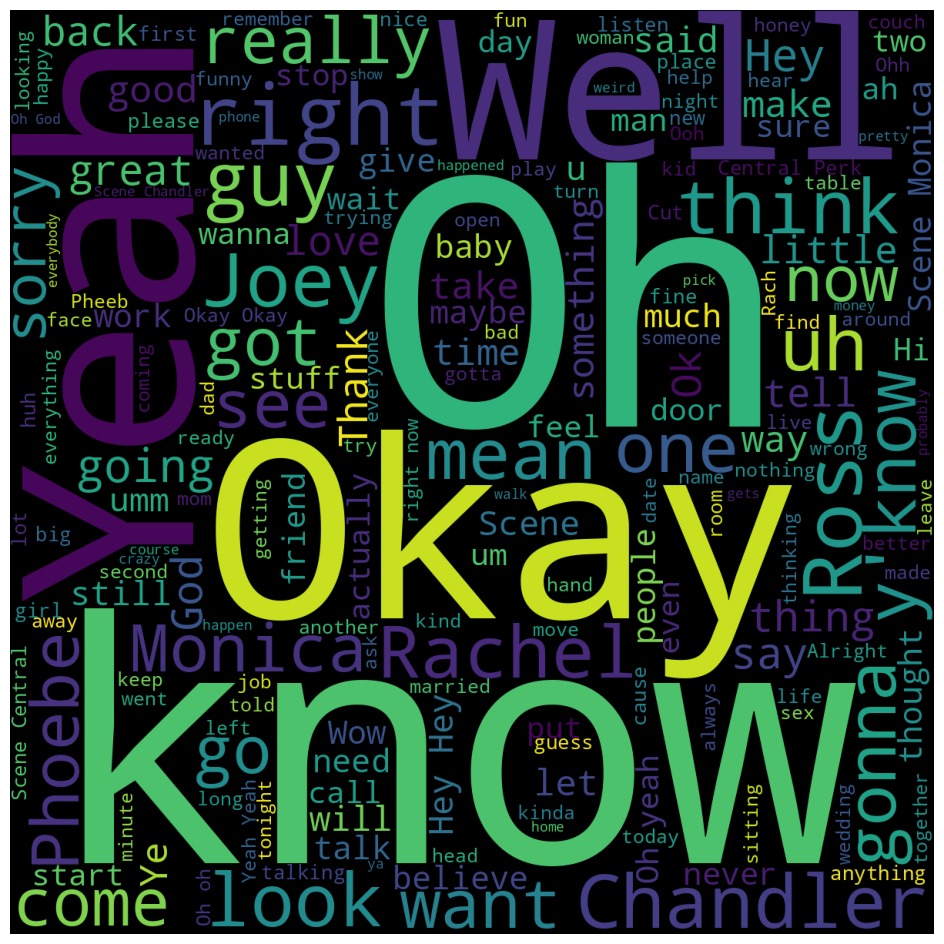

In [15]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=' '.join(friends_df['text'].values), ))
axis('off')

What do they talk about? They talk about each other. That's because they're friends. It's literally in the name of the show.